In [ ]:
#Funcoes que implementam o algoritmo de regularizacao, de Tikhonov de ordem zero e Variacao total.                                                     %
#Autor: Joao Pedro Reis                                                                                                                            
#Data: 29/06/2023                                                                                 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

In [2]:
def IRLS_Inv(trace, G, alphaL1, alphaL2,thresold,niter):
    dim = len(trace)
    R = np.eye(dim)
    I = np.eye(dim)
    G_T = G.transpose()
    count = 0 
    #Tikhonov ordem zero:
    M1_L2 = np.linalg.inv(np.matmul(G_T,G)+ (alphaL2*I))
    M2_L2 = np.matmul(G_T,trace)
    RegL2 = np.matmul(M1_L2,M2_L2)
    
    #Inversao do traco sismico utilizando regularizacao de tikhonov a partir da norma1 nos residuos dos dados
    while (count < niter):
            Gt_R = np.matmul(G_T,R)
            M1_L1 = np.linalg.inv(np.matmul(Gt_R,G)+(alphaL1*I))
            M2_L1 = np.matmul(Gt_R,trace)
            RegL1 = np.matmul(M1_L1, M2_L1)
            dcalc = np.matmul(G,RegL1)
            residuo = dcalc[:]-trace[:]
            for i in range((dim//2)+2):
                if abs(residuo[i]) >= thresold:
                    R[i,i]= 1/abs(residuo[i])
                else:
                    R[i,i]=1/thresold
            for i in range(dim):
                if abs(RegL1[i]) >= thresold:
                    I[i,i]= 1/abs(RegL1[i])
                else:
                    I[i,i]=1/thresold
            count = count + 1
    return RegL2, RegL1    

def Ricker_Wavelet(Peak_freq, Samples, Dt):
    t = np.arange(Samples)*(Dt/1000)
    t = np.concatenate((np.flipud(-t[1:]), t), axis=0)
    ricker = (1. -2.*(np.pi**2)*(Peak_freq**2)*(t**2))*np.exp(-(np.pi**2)*(Peak_freq**2)*(t**2))
    return t, ricker

In [3]:
t, ricker = Ricker_Wavelet(30,101,4)

Refl = np.zeros(521)
Refl[100]=0.2
Refl[230]=-0.15
Refl[340]=0.05
Refl[270]=-0.08
Refl[145]=0.1

n = len(Refl)
m = len(ricker)

In [5]:
Refl_T = Refl.reshape(n,1)
ricker_padded = np.append(ricker,np.zeros((1,2*n-m)))

In [16]:
G = toeplitz(400*ricker_padded, np.zeros((1,n)))
G = G[m//2+1:n+(m//2)+1,:]

In [19]:
trace = np.matmul(G, Refl_T)

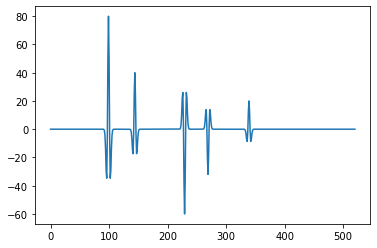

In [20]:
plt.plot(trace)

In [33]:
alphaL1=10
alphaL2=100
thresold = 0.0001
niter = 10

In [34]:
RegL2, RegL1 = IRLS_Inv(trace, G, alphaL1, alphaL2,thresold,niter)

RegL1n=RegL1[:]/max(abs(RegL1[:]))*max(abs(Refl[:]));
RegL2n=RegL2[:]/max(abs(RegL2[:]))*max(abs(Refl[:]));

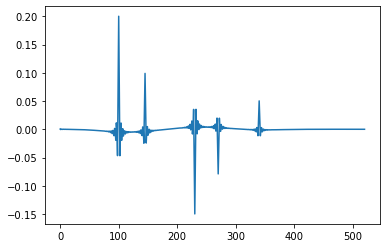

In [40]:
plt.plot(RegL2n)

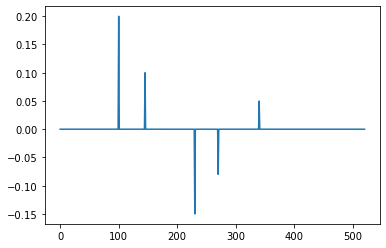

In [38]:
plt.plot(RegL1n)